# K-Means Algorithm

## Introduction
K-Means is a clustering algorithm used to partition a dataset into `k` clusters, where each observation belongs to the cluster with the nearest centroid. It is an unsupervised algorithm often used for data segmentation and pattern recognition.

### Applications
- Market segmentation
- Image compression
- Anomaly detection

## 1. Mathematical Foundations
The K-Means algorithm partitions the data by minimizing the sum of squared distances between each data point and its assigned cluster centroid.

### Objective
The objective function for K-Means is:

$$ J = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2 $$

Where:
- \( C_i \) is the set of points in cluster \( i \)
- \( \mu_i \) is the centroid of cluster \( i \)
- \( ||x - \mu_i||^2 \) is the squared distance between data point \( x \) and centroid \( \mu_i \).

## 2. Algorithm Steps
1. Choose the number of clusters \( k \).
2. Initialize \( k \) centroids randomly (or use `k-means++` for smarter initialization).
3. Assign each data point to the closest centroid.
4. Recompute the centroids by calculating the mean of all data points assigned to each cluster.
5. Repeat steps 3 and 4 until the centroids no longer change significantly (convergence).

In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

## 3. Data Generation and Visualization

We'll first generate some sample data to cluster using `make_blobs`. Then, we'll visualize the data to understand its structure.

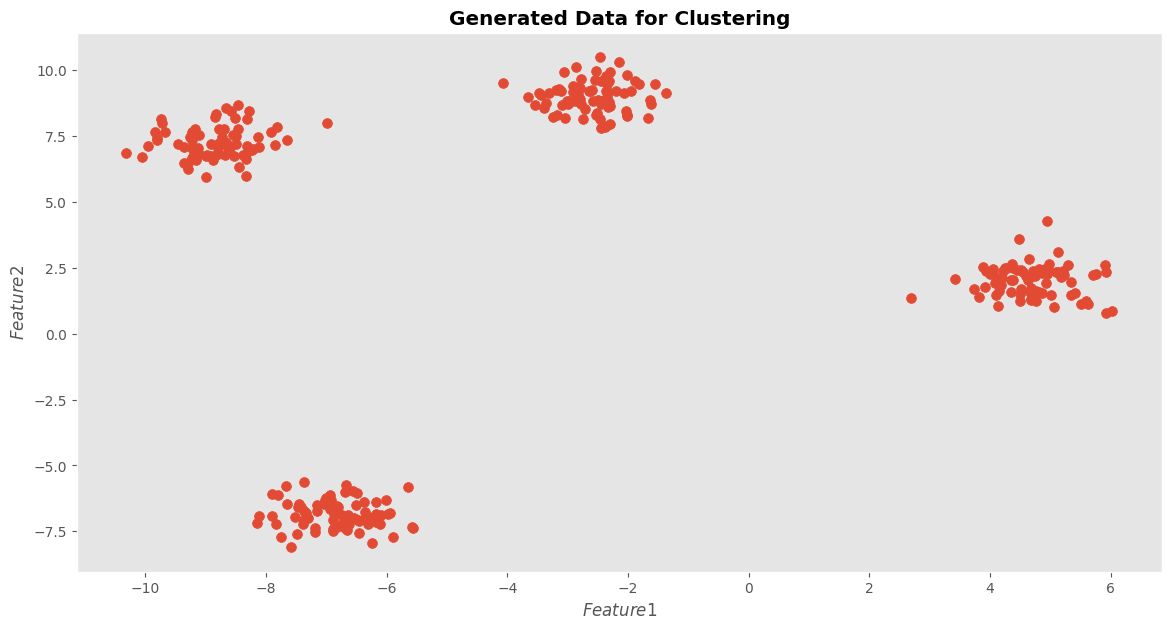

In [14]:
# Generating sample data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Visualizing the dataset
plt.figure(figsize=(14, 7))
plt.style.use('ggplot')
plt.grid(False)
plt.xlabel('$Feature 1$')
plt.ylabel('$Feature 2$')
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Generated Data for Clustering', fontweight='bold')
plt.show()

## 4. Implementing K-Means Clustering

Now, we'll apply the K-Means algorithm from the `sklearn` library to our dataset, specifying 4 clusters (`k=4`).

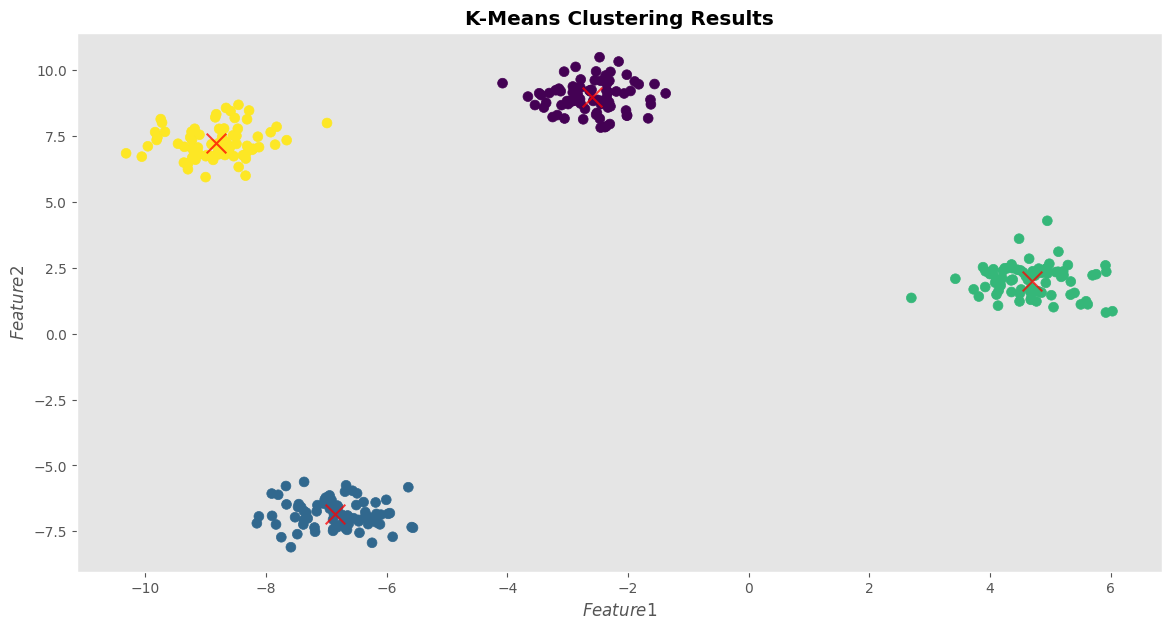

Inertia (within-cluster sum of squares): 203.89074684058338


In [15]:
# Initializing KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)

# Fitting the model and predicting the cluster assignments
y_kmeans = kmeans.fit_predict(X)

# Plotting the results
plt.figure(figsize=(14, 7))
plt.xlabel('$Feature 1$')
plt.ylabel('$Feature 2$')
plt.style.use('ggplot')
plt.grid(False)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plotting the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title('K-Means Clustering Results', fontweight='bold')
plt.show()

# Inertia: Sum of squared distances of samples to their closest cluster center
print(f"Inertia (within-cluster sum of squares): {kmeans.inertia_}")

## 5. Elbow Method to Determine Optimal \( k \)

Choosing the optimal number of clusters can be tricky. The elbow method helps by plotting the inertia (sum of squared distances) for different values of \( k \) and looking for an "elbow" where the decrease slows significantly.

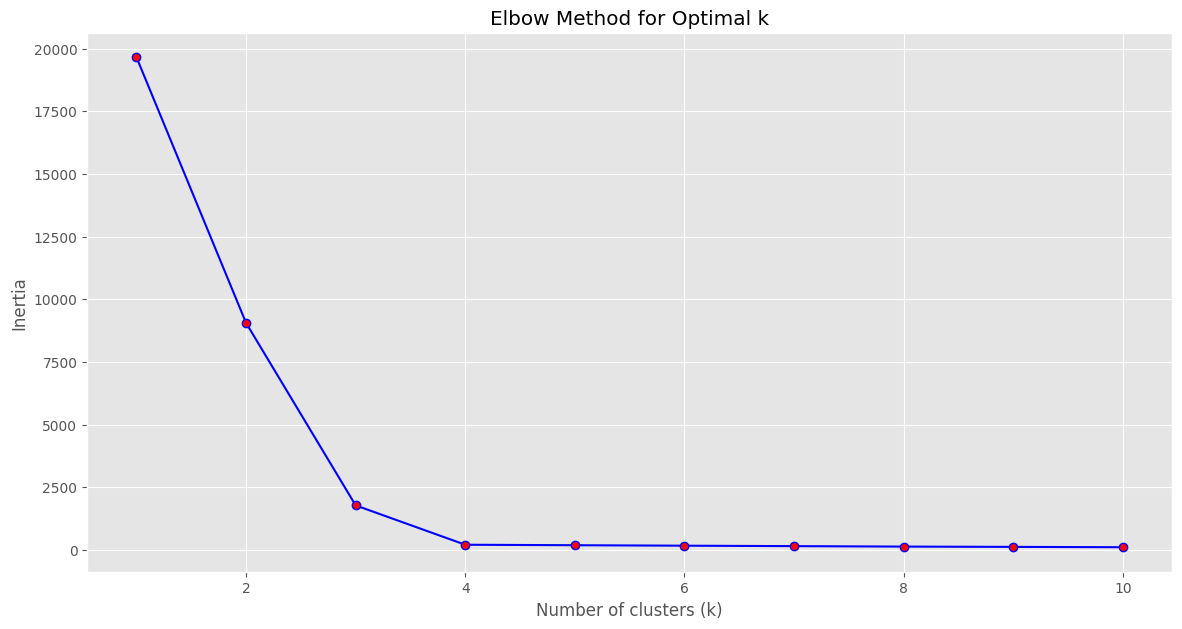

In [10]:
# Using the elbow method to determine the optimal number of clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(14, 7))
plt.style.use('ggplot')
plt.plot(k_range, inertia, 'bo-', markerfacecolor='red')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

## 6. Conclusion

**K-Means is a simple yet powerful algorithm for clustering data.
While its simplicity is an advantage, it has some limitations, including sensitivity to the initial centroids and a tendency to perform poorly when clusters are not spherical or well-separated. 
The elbow method is a useful tool for selecting the number of clusters \( k \), ensuring good performance of the algorithm.**